In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
path_to_file = "data/tumor.csv"
data = pd.read_csv(path_to_file)
data.head()

,Size,Malignant
0,3.788628,0
1,2.436510,0
2,2.096497,0
3,0.136507,0
4,1.722612,0


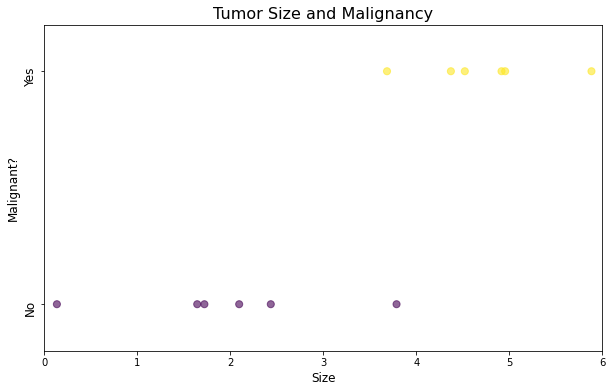

In [8]:
## function to make a 1d plot
def data_1Dplot(x, y, xlabel=None, ylabel=None, labels=None, title=None):
    ## scatter plot the data
    plt.scatter(x, y, c=y, s=50, alpha=0.6)
    ## set labels
    if not xlabel is None:
        plt.xlabel(xlabel, size=12)
    if not ylabel is None:
        plt.ylabel(ylabel, size=12)
    ## set ticks for y
    y_ticks = np.unique(y)
    if not labels is None:
        plt.yticks(y_ticks, labels, \
                   rotation='vertical', size=12)
    ## set title
    if not title is None:
        plt.title(title, size=16)
        
## feature x_tm and output x_tm
x_tm = data[["Size"]]
y_tm = data["Malignant"]
## Plot data points
plt.figure(figsize=(10, 6))
data_1Dplot(x_tm.values.flatten(), y_tm, \
            xlabel="Size", ylabel="Malignant?", \
            labels=["No", "Yes"], \
            title="Tumor Size and Malignancy")
## Set plot range
plt.axis([0,6, -.2, 1.2])
plt.show()

In [9]:
## Make a copy of the data set and add two outliers
x_tm2 = np.copy(x_tm)
x_tm2[-3, 0] = 13
x_tm2[-1, 0] = 14

In [10]:
#Activation Function: sigmoid
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [40]:
#Prediction
def predict(features, weights,bias):
  '''
  Returns 1D array of probabilities
  that the class label == 1
  '''
  z = np.dot(features, weights) + bias
  return sigmoid(z)

In [41]:
#The Cost Funtion: Negative Maximum Likelihood
def cost_function(features, labels, weights,bias):

    observations = len(labels)

    predictions = predict(features, weights,bias)

    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-labels)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost
    
    #Take the average cost
    cost = cost.sum() / observations

    return cost

In [42]:
#Using gradient descent to update parameters
def update_weights(features, labels, weights,bias,lr):

    N = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights,bias)

    #2 Transpose features 

    dw = np.dot(features.T,  predictions - labels)
    db = np.sum(predictions - labels)
    #3 Take the average cost derivative for each feature
    dw /= N
    db /= N
    #4 - Multiply the gradient by our learning rate
    dw *= lr
    db *= lr
    #5 - Subtract from our weights to minimize cost
    weights -= dw
    bias -= db
    return weights, bias

In [43]:
def decision_boundary(prob):
  return 1 if prob >= .5 else 0

In [44]:
def classify(predictions):
  '''
  input  - N element array of predictions between 0 and 1
  output - N element array of 0s (False) and 1s (True)
  '''
  _decision_boundary = np.vectorize(decision_boundary)
  return _decision_boundary(predictions).flatten()

In [45]:
def train(features, labels, weights,bias, lr, iters):
    cost_history = []

    for i in range(iters):
        weights,bias = update_weights(features, labels, weights,bias,lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights,bias)
        cost_history.append(cost)

        # Log Progress
        if i % 1000 == 0:
            print ("iter: "+str(i) + " cost: "+str(cost))

    return weights,bias, cost_history

In [46]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

In [80]:
weight,bias,cost = train(x_tm2, y_tm, [0],[0], 0.01, 3000)


iter: 0 cost: 0.6750626794351939
iter: 1000 cost: 0.4065128412525185
iter: 2000 cost: 0.3352082055947771


In [81]:
weight

array([0.83362351])

In [82]:
bias

array([-2.69666268])

In [83]:
predict_y= classify(predict(x_tm2,weight,bias))

In [84]:
accuracy(y_tm,predict_y)

0.9166666666666666